# Tokenization and Embeddings

Before feeding text into a Transformer model, it must be converted into a numerical format that the model can understand. This process involves two key steps: **Tokenization** and **Embeddings**.

### What is Tokenization?

Tokenization is the process of splitting text into smaller units called tokens. Tokens can be words, subwords, or characters. Different tokenization methods are used depending on the model architecture and language.

### Types of Tokenization:

1. **Word Tokenization**: Splits text into individual words (e.g., "The quick brown fox").
2. **Subword Tokenization**: Splits words into smaller subword units (e.g., "Transformer" -> "Trans", "##former").
3. **Character Tokenization**: Splits text into individual characters (e.g., "hello" -> "h", "e", "l", "l", "o").

### What are Embeddings?

Embeddings are dense vector representations of tokens. They map tokens to continuous vector spaces, capturing semantic meaning and relationships. 

### Types of Embeddings:

1. **Static Embeddings**: Pre-trained on large corpora and remain fixed during training (e.g., Word2Vec, GloVe).
2. **Contextual Embeddings**: Generated dynamically by Transformer models based on the context of the surrounding words (e.g., BERT, GPT).

Let's explore these concepts in detail and understand how they are applied in practice using the Huggingface `transformers` library.


## Tokenization with Huggingface Transformers

The `transformers` library provides a wide range of pre-trained tokenizers that are optimized for different Transformer models. These tokenizers convert raw text into token IDs that can be fed into a model.

### Example: Tokenizing Text using a Pre-trained Tokenizer
Let's use the BERT tokenizer to tokenize some example text.


In [1]:
from transformers import AutoTokenizer

In [2]:
# Load a pre-trained tokenizer
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

In [3]:
# Example text
text = "Transformers are revolutionizing NLP!"

In [4]:
text_2 = "Simeon Harrison is so competent and handsome, he is a unicorn trainer!"

In [5]:
# Tokenize the text
tokens = tokenizer.tokenize(text)
print("Tokens:", tokens)

Tokens: ['transformers', 'are', 'revolution', '##izing', 'nl', '##p', '!']


In [6]:
tokens_2 = tokenizer.tokenize(text_2)
print("Tokens:", tokens_2)

Tokens: ['simeon', 'harrison', 'is', 'so', 'competent', 'and', 'handsome', ',', 'he', 'is', 'a', 'unicorn', 'trainer', '!']


In [7]:
text_3 = "Large language models on supercomputers"

In [8]:
tokens_3 = tokenizer.tokenize(text_3)
print("Tokens:", tokens_3)

Tokens: ['large', 'language', 'models', 'on', 'super', '##com', '##put', '##ers']


In [9]:
# Let's look at the actual numeric representations of the tokens
token_ids = tokenizer.convert_tokens_to_ids(tokens)
print("Token IDs:", token_ids)

Token IDs: [19081, 2024, 4329, 6026, 17953, 2361, 999]


## Exploring Different Tokenization Methods

Huggingface provides several tokenization methods to handle various languages and tasks. Let's explore how different tokenization methods handle the same input text.


In [10]:
# Example of different tokenizers
tokenizers = ["bert-base-uncased", "gpt2", "xlm-roberta-base"]

for tok_name in tokenizers:
    print(f"\nUsing {tok_name} tokenizer:")
    tokenizer = AutoTokenizer.from_pretrained(tok_name)
    tokens = tokenizer.tokenize(text)
    token_ids = tokenizer.convert_tokens_to_ids(tokens)
    print("Tokens:", tokens)
    print("Token IDs:", token_ids)


Using bert-base-uncased tokenizer:
Tokens: ['transformers', 'are', 'revolution', '##izing', 'nl', '##p', '!']
Token IDs: [19081, 2024, 4329, 6026, 17953, 2361, 999]

Using gpt2 tokenizer:


tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Tokens: ['Transform', 'ers', 'Ġare', 'Ġrevolution', 'izing', 'ĠN', 'LP', '!']
Token IDs: [41762, 364, 389, 5854, 2890, 399, 19930, 0]

Using xlm-roberta-base tokenizer:


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/615 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.10M [00:00<?, ?B/s]

Tokens: ['▁Trans', 'former', 's', '▁are', '▁revolution', 'izing', '▁N', 'LP', '!']
Token IDs: [11062, 82772, 7, 621, 98834, 84382, 541, 37352, 38]


## Tokenizing a Whole Dataset
To tokenize a whole dataset, we first need to define a tokenize funktion.
We can then use the `map()` method to apply the function to the whole dataset.
But before that, we need to load a dataset. Let's use the emotions dataset from the Hugging Face Hub.

In [11]:
from datasets import load_dataset

We would like to know which tokenizer is behind the variable tokenizer.

In [12]:
tokenizer

XLMRobertaTokenizerFast(name_or_path='xlm-roberta-base', vocab_size=250002, model_max_length=512, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'bos_token': '<s>', 'eos_token': '</s>', 'unk_token': '<unk>', 'sep_token': '</s>', 'pad_token': '<pad>', 'cls_token': '<s>', 'mask_token': '<mask>'}, clean_up_tokenization_spaces=True),  added_tokens_decoder={
	0: AddedToken("<s>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	1: AddedToken("<pad>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	2: AddedToken("</s>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	3: AddedToken("<unk>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	250001: AddedToken("<mask>", rstrip=False, lstrip=True, single_word=False, normalized=False, special=True),
}

As you can see, we get a lot of information about the bert-base-uncased tokenizer.
Now, let's load the dataset:

In [13]:
emotions = load_dataset("emotion")

In [14]:
emotions

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

Here, you can see the splits the dataset comes in.

In [15]:
def tokenize(batch):
    return tokenizer(batch["text"], padding=True, truncation=True)

To see `tokenize()` in action, we pass two examples from the training set:

In [16]:
print(tokenize(emotions["train"][:2]))

{'input_ids': [[0, 17, 15935, 18, 12319, 157996, 27686, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [0, 17, 831, 738, 1295, 34698, 221, 15673, 9393, 47, 221, 121584, 297, 15673, 7844, 1660, 1295, 8035, 10932, 22008, 2750, 517, 7, 136, 83, 38075, 13, 2]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]}


Here you can see, that a tokenized dataset does not just consist of the token ids, but much more, which the model uses for training.  
Now, let's apply `map()`. `batch_size=None` means the tokenize function is mapped to the whole dataset as one big batch.

In [17]:
emotions_encoded = emotions.map(tokenize, batched=True, batch_size=None)

Map:   0%|          | 0/16000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [18]:
print(emotions_encoded["train"].column_names)

['text', 'label', 'input_ids', 'attention_mask']


## Embeddings with Transformers

Once text is tokenized, it is converted into embeddings before being fed into the Transformer model. Transformers then create **contextual embeddings** that capture the meaning of words in context.

### Example: Extracting Embeddings from a Pre-trained Model
Let's use a pre-trained BERT model to extract embeddings for some example text.

In [19]:
from transformers import AutoModel
import torch

In [20]:
# Load a pre-trained BERT model
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
model = AutoModel.from_pretrained("bert-base-uncased")

# Tokenize the text and convert to input IDs
inputs = tokenizer(text, return_tensors="pt")

In [21]:
inputs

{'input_ids': tensor([[  101, 19081,  2024,  4329,  6026, 17953,  2361,   999,   102]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1]])}

In [22]:
# Get the embeddings (output of the model's hidden states)
with torch.no_grad():
    outputs = model(**inputs)

# Extract the last hidden state
last_hidden_state = outputs.last_hidden_state

**Explanation**  
The `with torch.no_grad():` statement creates a context in which operations on tensors will not track gradients.
This is used during inference (when you are using the model to make predictions rather than training it) to save memory and speed up computation by not storing information needed to compute gradients.

`**inputs:` unpacks the inputs dictionary, passing its contents as keyword arguments to the model. `inputs` usually contains keys like:
- 'input_ids': The tokenized input text.
- 'attention_mask': A mask to differentiate real tokens from padding tokens.
- 'token_type_ids' (optional): Indicates the segments in tasks like question answering.

These inputs are then fed into the model for a forward pass.

`outputs:` is a variable that will store the output of the model's forward pass. The specific structure of outputs depends on the type of model used. For most transformer models, the output will be a named tuple or an OrderedDict containing several attributes.

`outputs.last_hidden_state:` extracts the "last hidden state" from the model's output. The last hidden state is a tensor representing the final layer's hidden states (embeddings) for each token in the input sequence.  
The `shape` of last_hidden_state is usually `(batch_size, sequence_length, hidden_size)`, where:
- batch_size: The number of input sequences in the batch.
- sequence_length: The number of tokens in each input sequence.
- hidden_size: The size of the hidden states (e.g., 768 for BERT base).  
Purpose: The last hidden state is a contextual representation of each token in the input sequence, capturing the meaning of the token in the context of the entire sequence.

Let's print that out:

In [23]:
print("Last Hidden State Shape:", last_hidden_state.shape)
print("Embeddings for each token:\n", last_hidden_state)

Last Hidden State Shape: torch.Size([1, 9, 768])
Embeddings for each token:
 tensor([[[ 0.2756,  0.0174,  0.3740,  ..., -0.1829,  0.4132,  0.2233],
         [ 1.5966,  0.0826,  0.3611,  ..., -0.4800,  0.4948,  0.1968],
         [ 0.5580, -0.0181,  0.1610,  ..., -0.1355,  0.6262, -0.2631],
         ...,
         [-0.0786, -0.6004,  1.1742,  ..., -0.1182,  0.2394, -0.1568],
         [-0.1662, -0.4884,  0.1007,  ...,  0.9541,  0.3570, -0.4344],
         [ 0.7650, -0.0820, -0.2475,  ...,  0.0726, -0.6258, -0.2202]]])


In [24]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [25]:
# New text
text = "The fat ginger cat sat on a mat"
inputs = tokenizer(text, return_tensors="pt")
with torch.no_grad():
    outputs = model(**inputs)

last_hidden_state = outputs.last_hidden_state

In [26]:
# Convert the embeddings to numpy array
embeddings = last_hidden_state[0].numpy()

# Get the special tokens' IDs
special_tokens_ids = tokenizer.all_special_ids
tokens = tokenizer.convert_ids_to_tokens(inputs['input_ids'][0])

# Filter out special tokens and their embeddings
filtered_embeddings = []
filtered_tokens = []

In [27]:
for i, token_id in enumerate(inputs['input_ids'][0]):
    if token_id not in special_tokens_ids:
        filtered_embeddings.append(embeddings[i])
        filtered_tokens.append(tokens[i])

# Apply PCA to reduce dimensions to 2D
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(filtered_embeddings)

**Explanation**  
The `.numpy()` method converts the PyTorch tensor to a NumPy array.
This step is necessary because PCA in scikit-learn operates on NumPy arrays, not PyTorch tensors.
Note: For this conversion to work, the tensor must be on the CPU. If the tensor is on a GPU, you should move it to the CPU first using .cpu().  
E.g.: `embeddings = last_hidden_state[0].cpu().numpy()`

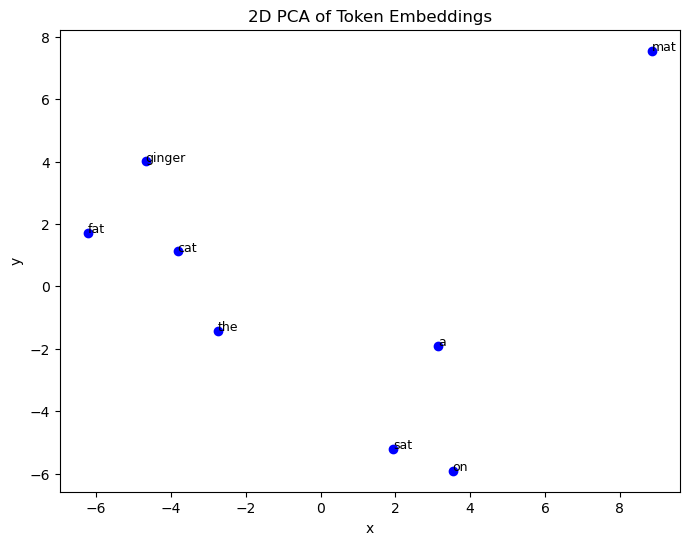

In [28]:
# Plot the embeddings
plt.figure(figsize=(8, 6))
plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], c='blue')

# Annotate the points with tokens
for i, token in enumerate(filtered_tokens):
    plt.text(reduced_embeddings[i, 0], reduced_embeddings[i, 1], token, fontsize=9)

plt.title("2D PCA of Token Embeddings")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

## Hands-On Exercise: Working with Tokenization and Embeddings

In this exercise, you will:
1. Choose a different pre-trained model from the Huggingface Hub.
2. Tokenize a new text input.
3. Extract and visualize embeddings for the tokens.

### Instructions:

1. Choose a model (e.g., "distilbert-base-uncased").
2. Tokenize the following text: "Huggingface makes NLP easy and accessible."
3. Extract embeddings using the last hidden state of the model.

Try it out below!

In [29]:
# Your code here:


### (Possible) Solution:

In [30]:
# Step 1: Choose a model
model_name = "distilbert-base-uncased"  # Change this to any model of your choice
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name)

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

In [31]:
# Step 2: Tokenize the new text
new_text = "Huggingface makes NLP easy and accessible."
inputs = tokenizer(new_text, return_tensors="pt")

In [32]:
# Step 3: Extract embeddings
with torch.no_grad():
    outputs = model(**inputs)

# Extract the last hidden state
new_last_hidden_state = outputs.last_hidden_state

## Conclusion

In this notebook, we explored the concepts of tokenization and embeddings, which are crucial for preparing text input for Transformer models. We demonstrated how to tokenize text using different methods and extract contextual embeddings from pre-trained models.

In [33]:
# Shut down the kernel to release memory
import IPython

app = IPython.Application.instance()
app.kernel.do_shutdown(restart=False)

{'status': 'ok', 'restart': False}